In [139]:
# Import library
import pandas as pd
import numpy as np

# visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# statistic library
from statistics import stdev
from scipy.stats import t 
# clean text
import re

# remove warning
import warnings
warnings.filterwarnings('ignore')
# date 
import matplotlib.dates as mdates


In [140]:
# load the dataset
data = pd.read_csv(r"C:\Users\sonef\Downloads\QVI_data.csv")
data.head(10)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
5,1005,2018-12-28,1,6,86,Cheetos Puffs 165g,1,2.8,165,CHEETOS,MIDAGE SINGLES/COUPLES,Mainstream
6,1007,2018-12-04,1,7,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8,110,INFUZIONS,YOUNG SINGLES/COUPLES,Budget
7,1007,2018-12-05,1,8,10,RRD SR Slow Rst Pork Belly 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Budget
8,1009,2018-11-20,1,9,20,Doritos Cheese Supreme 330g,1,5.7,330,DORITOS,NEW FAMILIES,Premium
9,1010,2018-09-09,1,10,51,Doritos Mexicana 170g,2,8.8,170,DORITOS,YOUNG SINGLES/COUPLES,Mainstream


In [141]:
# check null values
data.isnull().sum() # there is no null value

LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

### Select control store
The client has selected store 77, 86, 88 as trial store.
They want control stores to be established stores that are operational for the entire
observation period.

We would want to match trial stores to control stores that are similar to the trial
store prior to the trial period of Feb 2019 in terms of :
- Monthly overall sales revenue
- Monthly number of customers
- Monthly number of transactions per customer

In [142]:
# create the metrics of interest and filter to stores that are present throughout the pre-trial period
# Create YEARMONTH with number format yyytmm
data["YEARMONTH"] = ["".join(x.split("-")[0:2]) for x in data.DATE]
data["YEARMONTH"].head(5)

0    201810
1    201809
2    201903
3    201903
4    201811
Name: YEARMONTH, dtype: object

In [143]:

# monthly total sales 

sales = data.groupby(["STORE_NBR", "YEARMONTH"]).TOT_SALES.sum()
sales.head(5)

STORE_NBR  YEARMONTH
1          201807       206.9
           201808       176.1
           201809       278.8
           201810       188.1
           201811       192.6
Name: TOT_SALES, dtype: float64

In [144]:
# number of unique customer of each store in one month

ncustomers = data.groupby(['STORE_NBR', 'YEARMONTH']).LYLTY_CARD_NBR.nunique()
ncustomers

STORE_NBR  YEARMONTH
1          201807       49
           201808       42
           201809       59
           201810       44
           201811       46
                        ..
272        201902       45
           201903       50
           201904       54
           201905       34
           201906       34
Name: LYLTY_CARD_NBR, Length: 3169, dtype: int64

In [145]:
# Monthly average transaction per customer of each store 
nTxnPerCust = data.groupby(['STORE_NBR', 'YEARMONTH']).TXN_ID.count() / ncustomers # count of transaction/unique customer ID
nTxnPerCust

STORE_NBR  YEARMONTH
1          201807       1.061224
           201808       1.023810
           201809       1.050847
           201810       1.022727
           201811       1.021739
                          ...   
272        201902       1.066667
           201903       1.060000
           201904       1.037037
           201905       1.176471
           201906       1.088235
Length: 3169, dtype: float64

In [146]:
# Monthly average chips per transaction of each store
nChipsPerTxn = data.groupby(['STORE_NBR', 'YEARMONTH']).PROD_QTY.sum() / data.groupby(['STORE_NBR', 'YEARMONTH']).TXN_ID.count()
nChipsPerTxn 

STORE_NBR  YEARMONTH
1          201807       1.192308
           201808       1.255814
           201809       1.209677
           201810       1.288889
           201811       1.212766
                          ...   
272        201902       1.895833
           201903       1.905660
           201904       1.875000
           201905       1.775000
           201906       1.891892
Length: 3169, dtype: float64

In [147]:
# Monthlt average price per unit of each store
avgPricePerUnit = data.groupby(['STORE_NBR', 'YEARMONTH']).TOT_SALES.sum()/data.groupby(['STORE_NBR', 'YEARMONTH']).PROD_QTY.sum()
avgPricePerUnit

STORE_NBR  YEARMONTH
1          201807       3.337097
           201808       3.261111
           201809       3.717333
           201810       3.243103
           201811       3.378947
                          ...   
272        201902       4.346154
           201903       4.379208
           201904       4.239048
           201905       4.430986
           201906       4.458571
Length: 3169, dtype: float64

In [148]:
# Combine three above dataset into one
df = pd.concat((sales,ncustomers,avgPricePerUnit,nChipsPerTxn,nTxnPerCust), join= 'outer', axis= 1, )

df.reset_index(inplace = True)
df.rename(columns={'LYLTY_CARD_NBR' : 'ncustomer',0:'avgPricePerUnit', 1:'nChipsPerTxn', 2:'nTxnPerCust'}, inplace= True)

df

,STORE_NBR,YEARMONTH,TOT_SALES,ncustomer,avgPricePerUnit,nChipsPerTxn,nTxnPerCust
0,1,201807,206.9,49,3.337097,1.192308,1.061224
1,1,201808,176.1,42,3.261111,1.255814,1.023810
2,1,201809,278.8,59,3.717333,1.209677,1.050847
3,1,201810,188.1,44,3.243103,1.288889,1.022727
4,1,201811,192.6,46,3.378947,1.212766,1.021739
...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,4.346154,1.895833,1.066667
3165,272,201903,442.3,50,4.379208,1.905660,1.060000
3166,272,201904,445.1,54,4.239048,1.875000,1.037037
3167,272,201905,314.6,34,4.430986,1.775000,1.176471


In [149]:
#  Filter to the pre-trial period and stores with full observation periods
dt = pd.pivot_table(data, index = 'STORE_NBR', columns= 'YEARMONTH', values= 'TXN_ID', aggfunc= 'count')
dt
# Check null value ( we dont want any store number with a null value in the observation periods)
null_store = dt[dt.isnull().any(axis = 1)].index.tolist()

len(null_store) # There are 12 store with null values in the full observation periods
null_store


[11, 31, 44, 76, 85, 92, 117, 193, 206, 211, 218, 252]

In [150]:
# Drop null_store from the df
df = df[~df['STORE_NBR'].isin(null_store)]
# recheck
a = df.loc[df.STORE_NBR ==11] # 11 is in the null_store list
a # looking good
df

,STORE_NBR,YEARMONTH,TOT_SALES,ncustomer,avgPricePerUnit,nChipsPerTxn,nTxnPerCust
0,1,201807,206.9,49,3.337097,1.192308,1.061224
1,1,201808,176.1,42,3.261111,1.255814,1.023810
2,1,201809,278.8,59,3.717333,1.209677,1.050847
3,1,201810,188.1,44,3.243103,1.288889,1.022727
4,1,201811,192.6,46,3.378947,1.212766,1.021739
...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,4.346154,1.895833,1.066667
3165,272,201903,442.3,50,4.379208,1.905660,1.060000
3166,272,201904,445.1,54,4.239048,1.875000,1.037037
3167,272,201905,314.6,34,4.430986,1.775000,1.176471


In [151]:
# Create a dataframe contains pre trial period  < 201902
df.YEARMONTH = df.YEARMONTH.astype(int)
preTrialMeasure = df.loc[df.YEARMONTH < 201902,:]
preTrialMeasure.head(15)

,STORE_NBR,YEARMONTH,TOT_SALES,ncustomer,avgPricePerUnit,nChipsPerTxn,nTxnPerCust
0,1,201807,206.9,49,3.337097,1.192308,1.061224
1,1,201808,176.1,42,3.261111,1.255814,1.023810
2,1,201809,278.8,59,3.717333,1.209677,1.050847
3,1,201810,188.1,44,3.243103,1.288889,1.022727
4,1,201811,192.6,46,3.378947,1.212766,1.021739
5,1,201812,189.6,42,3.326316,1.212766,1.119048
6,1,201901,154.8,35,3.685714,1.166667,1.028571
12,2,201807,150.8,39,3.278261,1.121951,1.051282
13,2,201808,193.8,39,3.523636,1.279070,1.102564
14,2,201809,154.4,36,3.765854,1.108108,1.027778


We create a fuction to calculate how similar each potential control store is to the trial store.
We can calculate how correlated the performance of each store is to the trial store.

Apart from correlation, we can also calculate a standardised metric based on the
absolute difference between the trial store's performance and each control store's performance.



In [152]:
# Create a fuction to calculate the correlation and measure magnitude distance between the trial store and other control store
def CorrelationMagnitude(data, metric, trial_store):
    output =pd.DataFrame({"trial_store":[], "control_store":[],"corr_score":[], "magnitudedistance":[]})
    a = preTrialMeasure.loc[preTrialMeasure["STORE_NBR"] == trial_store, metric]
    a.reset_index(drop = True, inplace=  True)
    store_range =preTrialMeasure["STORE_NBR"].unique() # Drop trial store out
    for i in store_range:
        b = preTrialMeasure.loc[preTrialMeasure["STORE_NBR"]== i, metric]
        b.reset_index(drop = True, inplace = True)
        c = abs(a-b)
        # Normalized the magnitude diatance so that the measure range from 0 to 1
        d = np.mean(1-(c-min(c))/(max(c)-min(c))) # the starting point is the trail store
        output = output.append({"trial_store": trial_store,"control_store": i, "corr_score": b.corr(a), "magnitudedistance": d}, ignore_index= True)
    return output 


### Select control store for Trial store 77

metric: number of customer

In [153]:
corr_mag_ncustomer= CorrelationMagnitude(preTrialMeasure, "ncustomer", 77)
corr_mag_ncustomer.head(5)

,trial_store,control_store,corr_score,magnitudedistance
0,77.0,1.0,0.322168,0.663866
1,77.0,2.0,-0.572051,0.471429
2,77.0,3.0,0.834207,0.489796
3,77.0,4.0,-0.295639,0.498258
4,77.0,5.0,0.370659,0.512605


In [154]:
# hint: average on the scores would be 0.5 * corr_score + 0.5 *magnitudedistance
# The weight is 0.5 
corr_mag_ncustomer["ScoreNCust"] = corr_mag_ncustomer.corr_score * 0.5 + corr_mag_ncustomer.magnitudedistance* 0.5
corr_mag_ncustomer.head(5)

,trial_store,control_store,corr_score,magnitudedistance,ScoreNCust
0,77.0,1.0,0.322168,0.663866,0.493017
1,77.0,2.0,-0.572051,0.471429,-0.050311
2,77.0,3.0,0.834207,0.489796,0.662002
3,77.0,4.0,-0.295639,0.498258,0.101310
4,77.0,5.0,0.370659,0.512605,0.441632


metric: number of avarage sales

In [155]:
corr_mag_sales = CorrelationMagnitude(preTrialMeasure,"TOT_SALES",77)
corr_mag_sales.head(5)

,trial_store,control_store,corr_score,magnitudedistance
0,77.0,1.0,0.075218,0.408163
1,77.0,2.0,-0.263079,0.590119
2,77.0,3.0,0.806644,0.522914
3,77.0,4.0,-0.263300,0.644934
4,77.0,5.0,-0.110652,0.516320


In [156]:
# assign the score weight of 0.5 
corr_mag_sales["ScoreNSales"] = corr_mag_sales.corr_score*0.5 + corr_mag_sales.magnitudedistance *0.5
corr_mag_sales.head(5)

,trial_store,control_store,corr_score,magnitudedistance,ScoreNSales
0,77.0,1.0,0.075218,0.408163,0.241691
1,77.0,2.0,-0.263079,0.590119,0.163520
2,77.0,3.0,0.806644,0.522914,0.664779
3,77.0,4.0,-0.263300,0.644934,0.190817
4,77.0,5.0,-0.110652,0.516320,0.202834


Combine metric of sales and number of customers together. 

In [157]:
# combine ScoreNCust and ScoreNSales into one dataframe
control_score = pd.merge(corr_mag_ncustomer, corr_mag_sales, how = 'left', on = "control_store")
control_score.head(5)
control_score = control_score[["trial_store_x", "control_store","ScoreNCust", "ScoreNSales"]]
control_score.rename(columns={"trial_store_x":"trial_store"},inplace = True)
control_score.tail(5)



,trial_store,control_store,ScoreNCust,ScoreNSales
255,77.0,268.0,0.470473,0.387272
256,77.0,269.0,0.005090,0.121684
257,77.0,270.0,0.202710,0.453489
258,77.0,271.0,0.174100,0.348289
259,77.0,272.0,0.384336,0.320626


In [158]:
# Create a new column cof total score of ScoreNCust and ScoreNsales, with score weight = 0.5
control_score["Total_score"] = control_score.ScoreNCust *0.5 + control_score.ScoreNSales*0.5
control_score.head(5)
# Top 5 stores with the highest score
control_score.sort_values(by = "Total_score", ascending = False).head(5)

,trial_store,control_store,ScoreNCust,ScoreNSales,Total_score
221,77.0,233.0,0.816607,0.697290,0.756949
67,77.0,71.0,0.663123,0.789497,0.726310
79,77.0,84.0,0.715000,0.656972,0.685986
111,77.0,119.0,0.729729,0.636046,0.682887
108,77.0,115.0,0.645155,0.708347,0.676751


We found that store 233 has the highest score. Before assign 233 as the control store of the trial store 77.
We would make some visualization
control_store = 233

In [159]:
# Create a dataframe pastSales with store categories to check trends based on monthly sales 
pastSales = preTrialMeasure
trial_store = 77
control_store = 233

store_type = []
for i in preTrialMeasure.STORE_NBR:
    if i == trial_store:
        store_type.append('trial_store')
    elif i == control_store:
        store_type.append('control_store')
    else:
        store_type.append('other')

pastSales["store_type"] = store_type
# check again 
pastSales.groupby("store_type").store_type.count()


store_type
control_store       7
other            1806
trial_store         7
Name: store_type, dtype: int64

In [160]:
preTrialMeasure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 3163
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STORE_NBR        1820 non-null   int64  
 1   YEARMONTH        1820 non-null   int32  
 2   TOT_SALES        1820 non-null   float64
 3   ncustomer        1820 non-null   int64  
 4   avgPricePerUnit  1820 non-null   float64
 5   nChipsPerTxn     1820 non-null   float64
 6   nTxnPerCust      1820 non-null   float64
 7   store_type       1820 non-null   object 
dtypes: float64(4), int32(1), int64(2), object(1)
memory usage: 120.9+ KB


In [161]:
pastSales["transaction_month"] = pd.to_datetime(pastSales["YEARMONTH"].astype(str), format='%Y%m')
pastSales.head(5)

,STORE_NBR,YEARMONTH,TOT_SALES,ncustomer,avgPricePerUnit,nChipsPerTxn,nTxnPerCust,store_type,transaction_month
0,1,201807,206.9,49,3.337097,1.192308,1.061224,other,2018-07-01
1,1,201808,176.1,42,3.261111,1.255814,1.023810,other,2018-08-01
2,1,201809,278.8,59,3.717333,1.209677,1.050847,other,2018-09-01
3,1,201810,188.1,44,3.243103,1.288889,1.022727,other,2018-10-01
4,1,201811,192.6,46,3.378947,1.212766,1.021739,other,2018-11-01


In [162]:
sales = pastSales.loc[pastSales["STORE_NBR"]== trial_store,["transaction_month","TOT_SALES"]].reset_index(drop = True)
sales.rename(columns={"TOT_SALES":"trial_store"}, inplace = True)
sales.head(5)
sales["control_store"] = pastSales.loc[pastSales["STORE_NBR"]== control_store, "TOT_SALES"].reset_index(drop = True)
sales


,transaction_month,trial_store,control_store
0,2018-07-01,296.8,290.7
1,2018-08-01,255.5,285.9
2,2018-09-01,225.2,228.6
3,2018-10-01,204.5,185.7
4,2018-11-01,245.3,211.6
5,2018-12-01,267.3,279.8
6,2019-01-01,204.4,177.5


In [163]:
b= pastSales.loc[pastSales["store_type"]=='other', ["transaction_month", "TOT_SALES"]].reset_index(drop = True)
b = pd.DataFrame(b.groupby("transaction_month").TOT_SALES.mean()).reset_index(drop = True)

b

,TOT_SALES
0,638.004651
1,610.223450
2,620.198450
3,635.314729
4,618.864341
5,648.453876
6,628.684496


In [164]:
sales["other_store"] = b
sales.head(5)

,transaction_month,trial_store,control_store,other_store
0,2018-07-01,296.8,290.7,638.004651
1,2018-08-01,255.5,285.9,610.223450
2,2018-09-01,225.2,228.6,620.198450
3,2018-10-01,204.5,185.7,635.314729
4,2018-11-01,245.3,211.6,618.864341


<AxesSubplot:title={'center':'Total sales by Month'}, xlabel='transaction_month'>

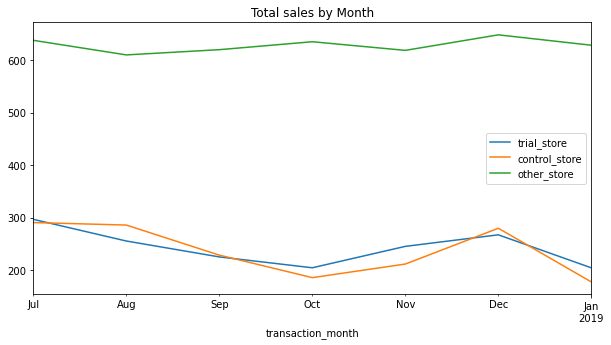

In [165]:
# visualize 
sales.plot(x = 'transaction_month', kind='line', figsize = (10,5), title = "Total sales by Month")

The pattern of control store is quite similar to those of trial store. The sales slowly decreases from August and hit bottom on October
After the lowest point in October, both sales of control and trial store increases again and reach the highest points in December

We move on to examine the number of customers

In [166]:
customers = pastSales.loc[pastSales["STORE_NBR"]== trial_store,["transaction_month","ncustomer"]].reset_index(drop = True)
customers.rename(columns={"ncustomer":"trial_customer"}, inplace = True)
customers["control_customer"] = pastSales.loc[pastSales["STORE_NBR"]== control_store, "ncustomer"].reset_index(drop = True)
c = pastSales.loc[pastSales["store_type"]== "other",["transaction_month","ncustomer"]].reset_index(drop = True)
c = pd.DataFrame(c.groupby("transaction_month").ncustomer.mean().reset_index(drop = True))
customers["other_store_cust"] = c
customers.head(5)

,transaction_month,trial_customer,control_customer,other_store_cust
0,2018-07-01,51,51,72.333333
1,2018-08-01,47,48,72.120155
2,2018-09-01,42,42,70.131783
3,2018-10-01,37,35,71.608527
4,2018-11-01,41,40,70.534884


<AxesSubplot:title={'center':'Number of Customers'}, xlabel='transaction_month'>

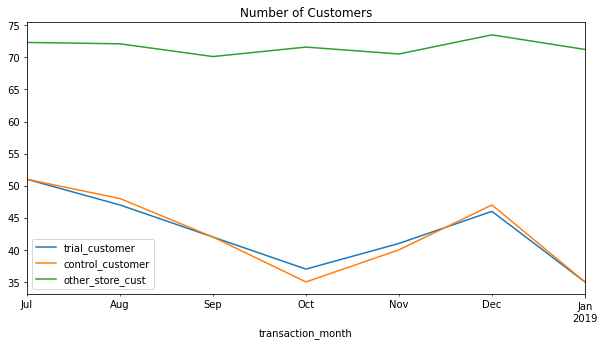

In [167]:
# Visualise
customers.plot(x = 'transaction_month', kind = 'line', figsize=(10,5), title = 'Number of Customers')

The customer number of control store 233 is almost identical to the trial store 77

We now want to see if there has been an uplift in overall chip sales.
We'll start with scaling the control store's sales to a level similar to control
for any differences between the two stores outside of the trial period. 

In [168]:
# Scaling pre-trial control sales to match pre-trial trial store sales
# Compare by divide total sum of "TOT_SALES" of trial store and control store in pre-trial period
scalingFactorSales = preTrialMeasure.loc[preTrialMeasure.STORE_NBR == 77, "TOT_SALES"].sum() / preTrialMeasure.loc[preTrialMeasure.STORE_NBR == control_store, "TOT_SALES"].sum()
scalingFactorSales

1.023617303289553

In [169]:
# Applying the scaling score
# df is the dataframe before filtering out the pre-trial period
df.head(5)
# create a new dataframe, and apply the scaling score
scaledControlSales = df.loc[df.STORE_NBR == control_store]
scaledControlSales["TOT_SALES"] *= scalingFactorSales
scaledControlSales


,STORE_NBR,YEARMONTH,TOT_SALES,ncustomer,avgPricePerUnit,nChipsPerTxn,nTxnPerCust
2699,233,201807,297.565550,51,3.303409,1.629630,1.058824
2700,233,201808,292.652187,48,3.573750,1.600000,1.041667
2701,233,201809,233.998916,42,3.265714,1.555556,1.071429
2702,233,201810,190.085733,35,3.316071,1.555556,1.028571
2703,233,201811,216.597421,40,3.412903,1.512195,1.025000
2704,233,201812,286.408121,47,3.730667,1.500000,1.063830
2705,233,201901,181.692071,35,3.776596,1.342857,1.000000
2706,233,201902,249.762622,45,3.485714,1.489362,1.044444
2707,233,201903,203.802205,40,3.374576,1.439024,1.025000
2708,233,201904,162.345704,30,3.447826,1.393939,1.100000


In [170]:
# Now that we have camparables sales figure for the control stores, we calculate the  diffirence between control stores sales
# and trial store salse during the trial period
percentageDiff = scaledControlSales[["YEARMONTH", "TOT_SALES"]].reset_index(drop = True)
percentageDiff.rename(columns = {"TOT_SALES":"control_store_sales"}, inplace = True)
percentageDiff

,YEARMONTH,control_store_sales
0,201807,297.565550
1,201808,292.652187
2,201809,233.998916
3,201810,190.085733
4,201811,216.597421
5,201812,286.408121
6,201901,181.692071
7,201902,249.762622
8,201903,203.802205
9,201904,162.345704


In [171]:

# trial store total sales
trial_sales = df.loc[df.STORE_NBR == trial_store]["TOT_SALES"].reset_index(drop = True)
trial_sales


0     296.8
1     255.5
2     225.2
3     204.5
4     245.3
5     267.3
6     204.4
7     235.0
8     278.5
9     263.5
10    299.3
11    264.7
Name: TOT_SALES, dtype: float64

In [172]:

# combine two dataset together
percentageDiff["trial_sales"] = trial_sales
percentageDiff

,YEARMONTH,control_store_sales,trial_sales
0,201807,297.565550,296.8
1,201808,292.652187,255.5
2,201809,233.998916,225.2
3,201810,190.085733,204.5
4,201811,216.597421,245.3
5,201812,286.408121,267.3
6,201901,181.692071,204.4
7,201902,249.762622,235.0
8,201903,203.802205,278.5
9,201904,162.345704,263.5


In [173]:
# Calculate the diffirence and put in a new column
percentageDiff["percentageDiff"] = abs(percentageDiff.trial_sales - percentageDiff.control_store_sales) / percentageDiff.control_store_sales
percentageDiff


,YEARMONTH,control_store_sales,trial_sales,percentageDiff
0,201807,297.565550,296.8,0.002573
1,201808,292.652187,255.5,0.126950
2,201809,233.998916,225.2,0.037602
3,201810,190.085733,204.5,0.075830
4,201811,216.597421,245.3,0.132516
5,201812,286.408121,267.3,0.066716
6,201901,181.692071,204.4,0.124980
7,201902,249.762622,235.0,0.059107
8,201903,203.802205,278.5,0.366521
9,201904,162.345704,263.5,0.623080


As our null hypothesis is that the trial period is the same as the pre-trial
period, let's take the standard deviation based on the scaled percentage difference
in the pre-trial period

In [174]:
stdDev = stdev(percentageDiff.loc[percentageDiff.YEARMONTH < 201902]["percentageDiff"])
stdDev

0.04994076264142537

There are 8 months in the pre-trial period, hence 8-1 = 7 degrees of freedom 

In [175]:
dfFreedom = 7

We will test with a null hypothesis of there being 0 difference between trial
and control stores. Hint: The test statistic here is (x - u)/standard deviation

In [176]:
percentageDiff["t_value"] = (percentageDiff.percentageDiff - 0)/stdDev
percentageDiff
mar_apr = percentageDiff.loc[(percentageDiff.YEARMONTH > 201901) & (percentageDiff.YEARMONTH < 201905)]["t_value"]
mar_apr

7     1.183534
8     7.339116
9    12.476373
Name: t_value, dtype: float64

In [177]:
# 95 % percentile of the t distribution 
t.isf(0.05, dfFreedom)
# t distribution for March and April is much bigger than the 95 percentile value of the t-distribution

1.8945786050613054

Let's create a more visual version of this by plotting the sales of the control
store, the sales of the trial stores and the 95th percentile value of sales of the
control store.

In [178]:
#Create new variables Store_type, totSales and TransactionMonth
# remeber the df dataframe with all sales data 
df


,STORE_NBR,YEARMONTH,TOT_SALES,ncustomer,avgPricePerUnit,nChipsPerTxn,nTxnPerCust
0,1,201807,206.9,49,3.337097,1.192308,1.061224
1,1,201808,176.1,42,3.261111,1.255814,1.023810
2,1,201809,278.8,59,3.717333,1.209677,1.050847
3,1,201810,188.1,44,3.243103,1.288889,1.022727
4,1,201811,192.6,46,3.378947,1.212766,1.021739
...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,4.346154,1.895833,1.066667
3165,272,201903,442.3,50,4.379208,1.905660,1.060000
3166,272,201904,445.1,54,4.239048,1.875000,1.037037
3167,272,201905,314.6,34,4.430986,1.775000,1.176471


In [179]:

# extract sales of control stores, and trials stores
controlSales = scaledControlSales.loc[scaledControlSales["STORE_NBR"] == control_store, ["YEARMONTH", "TOT_SALES"]].reset_index(drop = True)
controlSales.rename(columns = {"TOT_SALES":"controlSales"}, inplace = True)
trialSales = df.loc[df["STORE_NBR"]== trial_store,"TOT_SALES"].reset_index(drop = True)
totalSales = pd.concat([controlSales, trialSales], axis = 1)
totalSales.rename(columns = { "TOT_SALES":"trialSales"}, inplace = True)
totalSales
# Add the transaction month in a new column
totalSales["transactionDate"] = pd.to_datetime(totalSales["YEARMONTH"].astype(str), format = '%Y%m')
totalSales

,YEARMONTH,controlSales,trialSales,transactionDate
0,201807,297.565550,296.8,2018-07-01
1,201808,292.652187,255.5,2018-08-01
2,201809,233.998916,225.2,2018-09-01
3,201810,190.085733,204.5,2018-10-01
4,201811,216.597421,245.3,2018-11-01
5,201812,286.408121,267.3,2018-12-01
6,201901,181.692071,204.4,2019-01-01
7,201902,249.762622,235.0,2019-02-01
8,201903,203.802205,278.5,2019-03-01
9,201904,162.345704,263.5,2019-04-01


In [180]:
# create control store 95th percentile and 5th percentile and put in into two new columns
totalSales["controls95"] = totalSales.controlSales * (1 + stdDev*2)
totalSales["controls5"] = totalSales.controlSales * (1- stdDev*2)
totalSales = totalSales[["transactionDate", "controlSales", "trialSales", "controls95", "controls5"]]
totalSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   transactionDate  12 non-null     datetime64[ns]
 1   controlSales     12 non-null     float64       
 2   trialSales       12 non-null     float64       
 3   controls95       12 non-null     float64       
 4   controls5        12 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 608.0 bytes


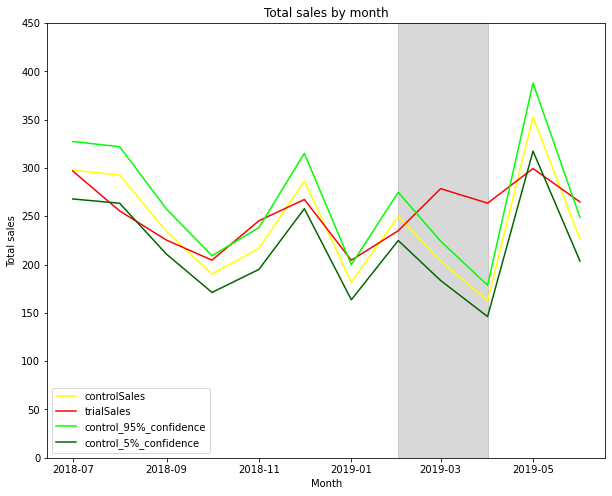

In [181]:
# Visualize 
plt.figure(figsize = (10,8))
plt.plot(totalSales.transactionDate, totalSales.controlSales, color = 'yellow')
plt.plot(totalSales.transactionDate, totalSales.trialSales, color = 'red')
plt.plot(totalSales.transactionDate, totalSales.controls95, color = 'lime')
plt.plot(totalSales.transactionDate, totalSales.controls5, color = 'darkgreen')

# set names 
plt.title("Total sales by month")
plt.xlabel("Month")
plt.ylabel("Total sales")
plt.ylim((0,450))

# Set legend
plt.legend(["controlSales", "trialSales", "control_95%_confidence", "control_5%_confidence"], loc = 3)


# highlight the trial period 
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.3)

From the gragh we can see, in the trial period, trial store 77 is significantly diffirent from its control store. 
The trial store performance lies outside the 95% and 5% confidence interval of the control stores in the last two out of the three months trial period

We take a look at the number of customers as well

In [182]:
# Do the same thing for ncustomer. we create a datarame scaleControlCust
preTrialMeasure.head(5)


,STORE_NBR,YEARMONTH,TOT_SALES,ncustomer,avgPricePerUnit,nChipsPerTxn,nTxnPerCust,store_type,transaction_month
0,1,201807,206.9,49,3.337097,1.192308,1.061224,other,2018-07-01
1,1,201808,176.1,42,3.261111,1.255814,1.023810,other,2018-08-01
2,1,201809,278.8,59,3.717333,1.209677,1.050847,other,2018-09-01
3,1,201810,188.1,44,3.243103,1.288889,1.022727,other,2018-10-01
4,1,201811,192.6,46,3.378947,1.212766,1.021739,other,2018-11-01


In [183]:
# calculating scaling factor for ncustomer
trialCust = preTrialMeasure.loc[preTrialMeasure.STORE_NBR == trial_store, ["ncustomer", "transaction_month"]].sum()
controlCust = preTrialMeasure.loc[preTrialMeasure.STORE_NBR == control_store,["ncustomer", "transaction_month"]].sum()
scalingFactorCust = trialCust/controlCust
scalingFactorCust

ncustomer    1.003356
dtype: float64

In [184]:

# scale number of customer for control store
df.head() # df is the original dataframe
df_trial = df.loc[df.STORE_NBR == trial_store,["YEARMONTH", "ncustomer"]]
df_trial.reset_index(drop = True, inplace = True)
df_trial.rename(columns = {"ncustomer":"trialCust"}, inplace = True)


df_control = df.loc[df.STORE_NBR == control_store, ["ncustomer"]] * scalingFactorCust
df_control.rename(columns = {"ncustomer":"controlCust"}, inplace = True)
df_control.reset_index(drop = True, inplace = True)
df_control


,controlCust
0,51.171141
1,48.161074
2,42.140940
3,35.117450
4,40.134228
5,47.157718
6,35.117450
7,45.151007
8,40.134228
9,30.100671


In [185]:
# Concat the trial store customer and scaled control store customer 

scaledControlCust = pd.concat([df_trial, df_control], axis = 1)
# Calculating the diffirence
scaledControlCust["percentageDiff"] = abs((scaledControlCust["controlCust"] - scaledControlCust["trialCust"])/scaledControlCust["controlCust"])
# change YEARMONTH number format to date format
scaledControlCust["YEARMONTH"]= pd.to_datetime(scaledControlCust["YEARMONTH"].astype(int), format = '%Y%m')


In [186]:
# Calcullating the standard deviation 
stdDevCust = stdev(scaledControlCust.loc[scaledControlCust["YEARMONTH"] < '2019-01-01']["percentageDiff"])
stdDevCust

0.018470751673520334

In [187]:
# calcualate the t-value 
scaledControlCust["t_value"] = (scaledControlCust["percentageDiff"] - 0)/stdDevCust
scaledControlCust.loc[(scaledControlCust.YEARMONTH < '2019-05-01')&(scaledControlCust.YEARMONTH > '2019-01-01')]["t_value"]

7     0.181069
8    13.308576
9    30.395459
Name: t_value, dtype: float64

In [188]:
# Null hypothesis is that there is no diffirence between trial store and control store 
t.isf(0.05, dfFreedom)
# t-value of March and April is much bigger than the 95th percentile distribution

1.8945786050613054

In [189]:
scaledControlCust["controls95"] = scaledControlCust["controlCust"] *(1 + stdDevCust*2)
scaledControlCust["controls5"] = scaledControlCust["controlCust"] * (1-stdDevCust*2)
scaledControlCust

,YEARMONTH,trialCust,controlCust,percentageDiff,t_value,controls95,controls5
0,2018-07-01,51,51.171141,0.003344,0.181069,53.061480,49.280802
1,2018-08-01,47,48.161074,0.024108,1.305206,49.940216,46.381931
2,2018-09-01,42,42.140940,0.003344,0.181069,43.697689,40.584190
3,2018-10-01,37,35.117450,0.053607,2.902278,36.414741,33.820158
4,2018-11-01,41,40.134228,0.021572,1.167895,41.616847,38.651609
5,2018-12-01,46,47.157718,0.024550,1.329124,48.899795,45.415641
6,2019-01-01,35,35.117450,0.003344,0.181069,36.414741,33.820158
7,2019-02-01,45,45.151007,0.003344,0.181069,46.818953,43.483061
8,2019-03-01,50,40.134228,0.245819,13.308576,41.616847,38.651609
9,2019-04-01,47,30.100671,0.561427,30.395459,31.212635,28.988707


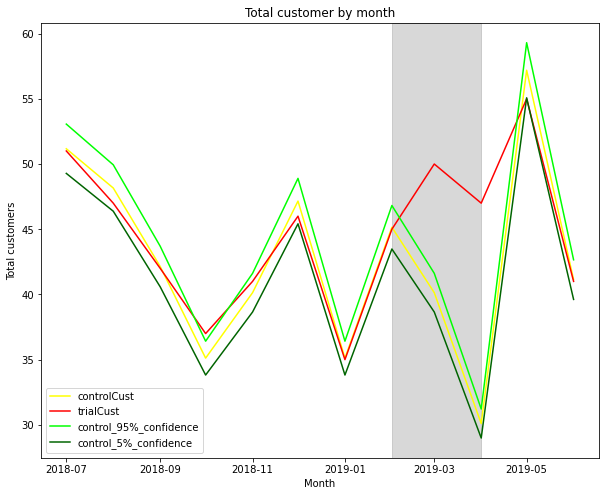

In [190]:
# Visualize 
# Visualize 
plt.figure(figsize = (10,8))
plt.plot(scaledControlCust.YEARMONTH, scaledControlCust.controlCust, color = 'yellow')
plt.plot(scaledControlCust.YEARMONTH, scaledControlCust.trialCust, color = 'red')
plt.plot(scaledControlCust.YEARMONTH, scaledControlCust.controls95, color = 'lime')
plt.plot(scaledControlCust.YEARMONTH, scaledControlCust.controls5, color = 'darkgreen')

# set names 
plt.title("Total customer by month")
plt.xlabel("Month")
plt.ylabel("Total customers")
# Set legend
plt.legend(["controlCust", "trialCust", "control_95%_confidence", "control_5%_confidence"], loc = 3)

# highlight the trial period 
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.3)

During the trial period, the number of customers is also significantly higher in trial store compared to its control store
Conclusion: The trial store 77 witnesses a significant increase in number of total sales and customer, especially in the month of March and April.


### Trial store 88
repeating the same process as the trial store 77


In [191]:
trial_store = 88
# using define fuction to calculate the correlation
nCustomer_score = CorrelationMagnitude(preTrialMeasure,"ncustomer", trial_store)
nCustomer_score.head(5)

,trial_store,control_store,corr_score,magnitudedistance
0,88.0,1.0,0.305334,0.357143
1,88.0,2.0,-0.452379,0.285714
2,88.0,3.0,0.522884,0.683673
3,88.0,4.0,-0.361503,0.577922
4,88.0,5.0,-0.025320,0.558442


In [192]:
# add the weight 
corr_weight = 0.5
nCustomer_score["Cust_Score"] = nCustomer_score.corr_score * corr_weight + nCustomer_score.magnitudedistance * corr_weight
nCustomer_score.head(5)

,trial_store,control_store,corr_score,magnitudedistance,Cust_Score
0,88.0,1.0,0.305334,0.357143,0.331238
1,88.0,2.0,-0.452379,0.285714,-0.083332
2,88.0,3.0,0.522884,0.683673,0.603279
3,88.0,4.0,-0.361503,0.577922,0.108210
4,88.0,5.0,-0.025320,0.558442,0.266561


In [193]:
nSales_score = CorrelationMagnitude(preTrialMeasure, "TOT_SALES", trial_store)
nSales_score.head(5)

,trial_store,control_store,corr_score,magnitudedistance
0,88.0,1.0,0.813636,0.548959
1,88.0,2.0,-0.067927,0.541212
2,88.0,3.0,-0.507847,0.458109
3,88.0,4.0,-0.745566,0.484447
4,88.0,5.0,0.190330,0.496409


In [194]:
nSales_score["Sales_Score"] = nSales_score.corr_score * corr_weight + nSales_score.magnitudedistance * corr_weight
nSales_score.head(5)

,trial_store,control_store,corr_score,magnitudedistance,Sales_Score
0,88.0,1.0,0.813636,0.548959,0.681297
1,88.0,2.0,-0.067927,0.541212,0.236643
2,88.0,3.0,-0.507847,0.458109,-0.024869
3,88.0,4.0,-0.745566,0.484447,-0.130559
4,88.0,5.0,0.190330,0.496409,0.343370


In [195]:
Score_control = pd.concat([nSales_score, nCustomer_score["Cust_Score"]], axis = 1)
# calculate the final score by adding corr_weight
Score_control["finalScore"] = Score_control.Sales_Score * corr_weight + Score_control.Cust_Score * corr_weight 
# Top 5 highest score
Score_control.sort_values(by = "finalScore", ascending = False).head(5)
# Store 178 has the highest score. bb

,trial_store,control_store,corr_score,magnitudedistance,Sales_Score,Cust_Score,finalScore
170,88.0,178.0,0.731857,0.569749,0.650803,0.707828,0.679316
12,88.0,14.0,0.698557,0.593571,0.646064,0.685774,0.665919
126,88.0,134.0,0.864293,0.685875,0.775084,0.540154,0.657619
225,88.0,237.0,0.308479,0.595469,0.451974,0.777235,0.614604
179,88.0,187.0,0.599076,0.634428,0.616752,0.594560,0.605656


Although store 178 has the higheest score, The Quantium team chose 237 store as the control store of store 88
We will make some visuallization to understand why store 237 was chosen

In [196]:

# Examine the number of customers of trial store and the top 5 control store with the highest score
# Create a dataframe that compare the top 5 highest score
top5store =[178,14, 134, 237, 187, 88]
top5 = preTrialMeasure.loc[preTrialMeasure["STORE_NBR"].isin(top5store)]
top5["YEARMONTH"] = pd.to_datetime(top5["YEARMONTH"].astype(str), format = '%Y%m')
store14 = top5.loc[top5.STORE_NBR == 14]
store178 = top5.loc[top5.STORE_NBR == 178]
store134 = top5.loc[top5.STORE_NBR == 134]
store187 = top5.loc[top5.STORE_NBR == 187]
store88 = top5.loc[top5.STORE_NBR == 88]
store237 = top5.loc[top5.STORE_NBR == 237]

(0.0, 1900.0)

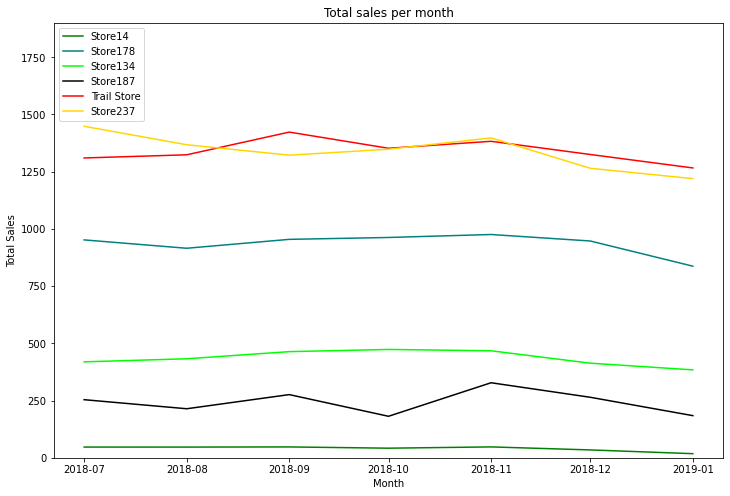

In [197]:
# visualize 
plt.figure(figsize = (12,8))
plt.plot(store14.YEARMONTH, store14.TOT_SALES, color = 'green')
plt.plot(store178.YEARMONTH, store178.TOT_SALES, color = 'teal')
plt.plot(store134.YEARMONTH, store134.TOT_SALES, color = 'lime')
plt.plot(store187.YEARMONTH, store187.TOT_SALES, color = 'black')
plt.plot(store88.YEARMONTH, store88.TOT_SALES, color = 'red')
plt.plot(store237.YEARMONTH, store237.TOT_SALES, color = 'gold')
# Set name and legend
plt.title("Total sales per month")
plt.legend(["Store14", "Store178", "Store134", "Store187", "Trail Store", "Store237"], loc = 2)
plt.xlabel("Month")
plt.ylabel("Total Sales")
# Set limit
plt.ylim((0, 1900))



Look at the gragh, trial store 88 is most similar to store 237 in terms of monthly total sales. 
Monthly total sales of store 237 and 88 both went up in October 2018, and had decrease trend since November 2018
The trend of monthly total sales of store 187 looks almost idential to the trial store. However, the total sales is much lower
The other two store is either having the similar trendline or having the same total sales per months.

(0.0, 250.0)

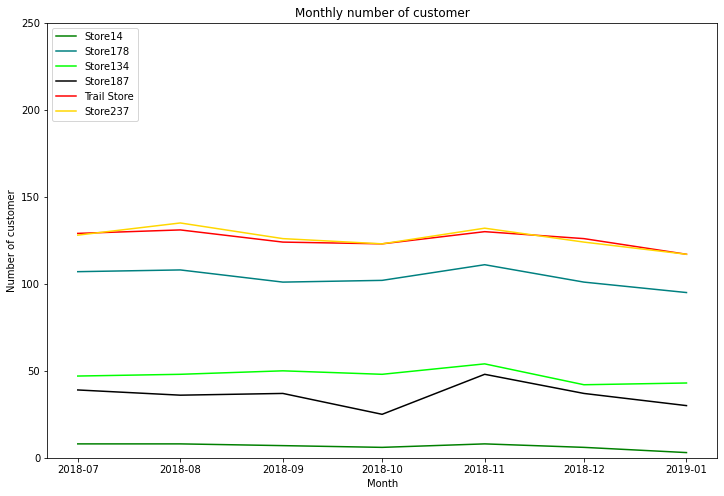

In [198]:
# Now we do the same visualization to examine the number of customer
plt.figure(figsize = (12,8))
plt.plot(store14.YEARMONTH, store14.ncustomer, color = 'green')
plt.plot(store178.YEARMONTH, store178.ncustomer, color = 'teal')
plt.plot(store134.YEARMONTH, store134.ncustomer, color = 'lime')
plt.plot(store187.YEARMONTH, store187.ncustomer, color = 'black')
plt.plot(store88.YEARMONTH, store88.ncustomer, color = 'red')
plt.plot(store237.YEARMONTH, store237.ncustomer, color = 'gold')
# Set name and legend
plt.title("Monthly number of customer")
plt.legend(["Store14", "Store178", "Store134", "Store187", "Trail Store", "Store237"], loc = 2)
plt.xlabel("Month")
plt.ylabel("Number of customer")
# Set limit
plt.ylim((0, 250))


As we can see, customer number of store 237 and trial store are almost identical.
Store 178, 187, and 134 have the same trend, but the values are much smaller. 
After doing some visualization, we choose store 237 as the control store of trial store 88
### Accessment for store 88

In [199]:
control_store = 237
# Find the scaling factor 
trialSum = preTrialMeasure.loc[preTrialMeasure.STORE_NBR == trial_store]["TOT_SALES"].sum()
controlSum = preTrialMeasure.loc[preTrialMeasure.STORE_NBR == control_store]["TOT_SALES"].sum()
scalingFactorSales = trialSum/controlSum
scalingFactorSales


1.001558330664959

In [200]:
# then apply the scaling factor to the control store
# Create a new dataframe with total sales of trial store, sales of control stores after scaling, and calculate the percentage diffirence
# df is the dataframe of full observation of 12 months (without filtering out the trial period)
df.head(5)
# Extract the sales of trial store
trialSales = df.loc[df.STORE_NBR == trial_store, ["YEARMONTH", "TOT_SALES"]].reset_index(drop = True)
trialSales.rename(columns = {"TOT_SALES":"trialSales"}, inplace = True)

# Extract the sales of control store and apply the scaling factor
controlSales = df.loc[df.STORE_NBR == control_store, ["TOT_SALES"]].reset_index(drop = True)
controlSales.rename(columns = {"TOT_SALES":"controlSales"}, inplace = True)
controlSales["controlSales"] *= scalingFactorSales

# concat the two dataframe together
totalSales = pd.concat([trialSales, controlSales], axis = 1)
totalSales.YEARMONTH = pd.to_datetime(totalSales.YEARMONTH.astype(int), format = '%Y%m')
totalSales

,YEARMONTH,trialSales,controlSales
0,2018-07-01,1310.00,1450.657086
1,2018-08-01,1323.80,1369.931485
2,2018-09-01,1423.00,1324.260425
3,2018-10-01,1352.40,1350.401097
4,2018-11-01,1382.80,1399.777923
5,2018-12-01,1325.20,1266.971288
6,2019-01-01,1266.40,1221.600696
7,2019-02-01,1370.20,1406.989143
8,2019-03-01,1477.20,1210.082775
9,2019-04-01,1439.40,1206.477165


In [201]:
# Calculate the percentage diffirence 
totalSales["percentageDiff"] = abs((totalSales.controlSales - totalSales.trialSales)/ totalSales.controlSales)
totalSales

,YEARMONTH,trialSales,controlSales,percentageDiff
0,2018-07-01,1310.00,1450.657086,0.096961
1,2018-08-01,1323.80,1369.931485,0.033674
2,2018-09-01,1423.00,1324.260425,0.074562
3,2018-10-01,1352.40,1350.401097,0.001480
4,2018-11-01,1382.80,1399.777923,0.012129
5,2018-12-01,1325.20,1266.971288,0.045959
6,2019-01-01,1266.40,1221.600696,0.036673
7,2019-02-01,1370.20,1406.989143,0.026147
8,2019-03-01,1477.20,1210.082775,0.220743
9,2019-04-01,1439.40,1206.477165,0.193060


In [202]:
# calculate the standard deviation
stdDev = stdev(totalSales.loc[totalSales["YEARMONTH"] < '2019-02-01']["percentageDiff"])
stdDev
# degree of freedom is the same as trial store
dfFreedom = 7

In [203]:
# The null hypothesis is that there is no diffirence between sales of control store and trial store
totalSales["t_values"] = (totalSales["percentageDiff"]-0) / stdDev
totalSales.loc[(totalSales["YEARMONTH"] >'2019-01-01') & (totalSales["YEARMONTH"] < '2019-05-01'), "t_values"]

7    0.781270
8    6.595668
9    5.768527
Name: t_values, dtype: float64

In [204]:
# Find the 95th percentile of the t-distribution
t.isf(0.05, dfFreedom)

1.8945786050613054

In [205]:
# calculate the sales with 95% confidence interval and 5 % confidence interval
totalSales["controls95"] = totalSales["controlSales"] * (1+ stdDev*2)
totalSales["controls5"] = totalSales["controlSales"] * (1-stdDev*2)
totalSales.head(5)

,YEARMONTH,trialSales,controlSales,percentageDiff,t_values,controls95,controls5
0,2018-07-01,1310.0,1450.657086,0.096961,2.897136,1547.757884,1353.556288
1,2018-08-01,1323.8,1369.931485,0.033674,1.006168,1461.628855,1278.234114
2,2018-09-01,1423.0,1324.260425,0.074562,2.227870,1412.900769,1235.620080
3,2018-10-01,1352.4,1350.401097,0.001480,0.044228,1440.791187,1260.011008
4,2018-11-01,1382.8,1399.777923,0.012129,0.362408,1493.473086,1306.082759


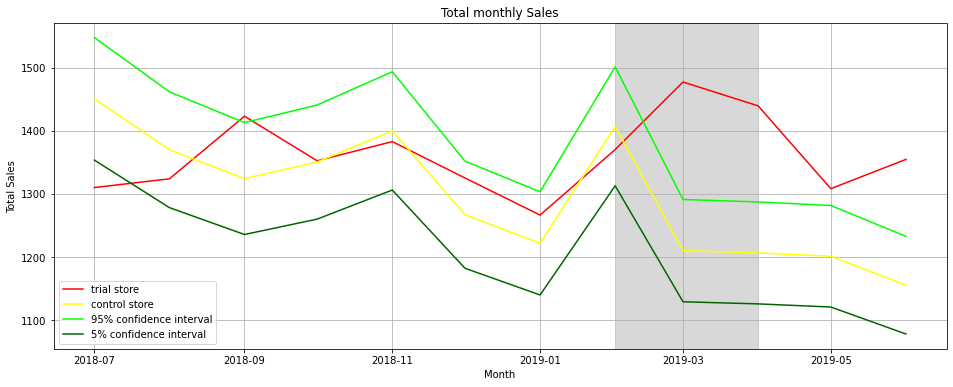

In [206]:
# Visualization 
plt.figure(figsize = (16,6))
plt.plot(totalSales.YEARMONTH, totalSales.trialSales, color = 'red')
plt.plot(totalSales.YEARMONTH, totalSales.controlSales, color = 'yellow')
plt.plot(totalSales.YEARMONTH, totalSales.controls95, color = 'lime')
plt.plot(totalSales.YEARMONTH, totalSales.controls5, color = 'darkgreen')

# set names 
plt.title("Total monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.legend(["trial store", "control store", "95% confidence interval", "5% confidence interval"], loc = 3)

# highlight the trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.3)
# show prid
plt.grid()
plt.show()


Look at the gragh, we see that the trial store 88 is significantly diffirence to its control store during the tril period
The sales number lies outside of the 95% confidence interval and 5% confidence interval in March and April

Let´s move on to the number of customers

In [207]:
# Do the same thing to examine the number of customer
trialSum = preTrialMeasure.loc[preTrialMeasure.STORE_NBR == trial_store]["ncustomer"].sum()
controlSum = preTrialMeasure.loc[preTrialMeasure.STORE_NBR == control_store]["ncustomer"].sum()
scalingFactorCust = trialSum/controlSum
scalingFactorCust

0.9943502824858758

In [208]:
# then apply the scaling factor to the control store
# Create a new dataframe with total sales of trial store, sales of control stores after scaling, and calculate the percentage diffirence
# df is the dataframe of full observation of 12 months (without filtering out the trial period)
df.head(5)


,STORE_NBR,YEARMONTH,TOT_SALES,ncustomer,avgPricePerUnit,nChipsPerTxn,nTxnPerCust
0,1,201807,206.9,49,3.337097,1.192308,1.061224
1,1,201808,176.1,42,3.261111,1.255814,1.023810
2,1,201809,278.8,59,3.717333,1.209677,1.050847
3,1,201810,188.1,44,3.243103,1.288889,1.022727
4,1,201811,192.6,46,3.378947,1.212766,1.021739


In [209]:
# Extract the sales of trial store
trialCust = df.loc[df.STORE_NBR == trial_store, ["YEARMONTH", "ncustomer"]].reset_index(drop = True)
trialCust.rename(columns = {"ncustomer":"trialCust"}, inplace = True)

# Extract the sales of control store and apply the scaling factor
controlCust = df.loc[df.STORE_NBR == control_store, ["ncustomer"]].reset_index(drop = True)
controlCust.rename(columns = {"ncustomer":"controlCust"}, inplace = True)
controlCust["controlCust"] *= scalingFactorCust

# concat the two dataframe together
totalCust = pd.concat([trialCust, controlCust], axis = 1)
totalCust.YEARMONTH = pd.to_datetime(totalCust.YEARMONTH.astype(int), format = '%Y%m')
totalCust

,YEARMONTH,trialCust,controlCust
0,2018-07-01,129,127.276836
1,2018-08-01,131,134.237288
2,2018-09-01,124,125.288136
3,2018-10-01,123,122.305085
4,2018-11-01,130,131.254237
5,2018-12-01,126,123.299435
6,2019-01-01,117,116.338983
7,2019-02-01,124,125.288136
8,2019-03-01,134,118.327684
9,2019-04-01,128,119.322034


In [210]:
# Calculate the percentage diffirence
totalCust["percentageDiff"] = abs((totalCust.controlCust - totalCust.trialCust) / totalCust.controlCust)
totalCust
# Calculate the standard deviation 
stdDev = stdev(totalCust.loc[totalCust.YEARMONTH < '2019-02-01']["percentageDiff"])
stdDev
# Degree of freedom is 8 - 1 = 7 
dfFreedom = 7
# The null hypothesis is that there is 0 diffirence between trial store and control store
# Calculate the t-values in a new column 
totalCust["t_values"] = (totalCust["percentageDiff"] - 0) / stdDev
totalCust.loc[(totalCust.YEARMONTH > '2019-01-01') & (totalCust.YEARMONTH < '2019-05-01')]["t_values"]

7     1.387456
8    17.873693
9     9.814423
Name: t_values, dtype: float64

In [211]:
# Calculate the 95 % confidence interval
t.isf(0.05, dfFreedom)
# The t-values during the last trial months is much bigger than 95% confidence of interval

1.8945786050613054

In [212]:
# calcualting the 95% confidence interval and 5% confidence interval and add as new columns
totalCust["controls95"] = totalCust["controlCust"] * (1 + stdDev*2)
totalCust["controls5"]  = totalCust["controlCust"] * (1-stdDev*2)
totalCust.head(5)


,YEARMONTH,trialCust,controlCust,percentageDiff,t_values,controls95,controls5
0,2018-07-01,129,127.276836,0.013539,1.827026,129.163141,125.390531
1,2018-08-01,131,134.237288,0.024116,3.254435,136.226750,132.247826
2,2018-09-01,124,125.288136,0.010281,1.387456,127.144967,123.431304
3,2018-10-01,123,122.305085,0.005682,0.766752,124.117706,120.492464
4,2018-11-01,130,131.254237,0.009556,1.289537,133.199489,129.308985


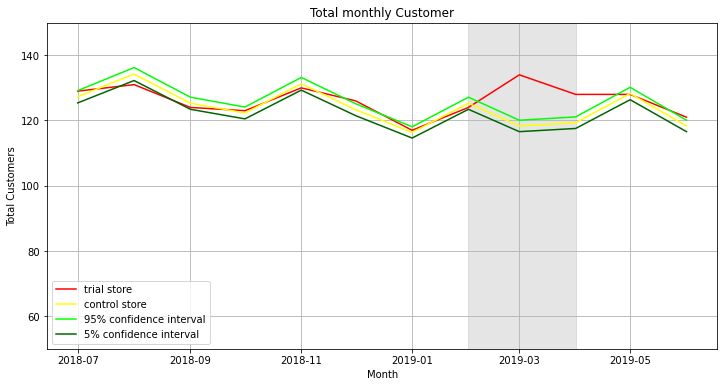

In [213]:
# Let´s make some visualization 
plt.figure(figsize = (12,6))
plt.plot(totalCust["YEARMONTH"], totalCust["trialCust"], color = 'red')
plt.plot(totalCust["YEARMONTH"], totalCust["controlCust"], color = 'yellow')
plt.plot(totalCust["YEARMONTH"], totalCust["controls95"], color = 'lime')
plt.plot(totalCust["YEARMONTH"], totalCust["controls5"], color = 'darkgreen')
plt.ylim((50, 150))

# set names 
plt.title("Total monthly Customer")
plt.xlabel("Month")
plt.ylabel("Total Customers")
plt.legend(["trial store", "control store", "95% confidence interval", "5% confidence interval"], loc = 3)
# highlight the trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)
# set grid
plt.grid()
plt.show()

As we can see from the gragh, during the trial period, the number of customers of trial store is much higher than the control store. 

### Select trial store 86

In [214]:
trial_store = 86
# apply the pre-define fuction to calcualte the magnitude and correlation score
# For number of customer
corr_mag_ncustomer = CorrelationMagnitude(preTrialMeasure,"ncustomer", trial_store)
# Apply provided weight = 0.5 to calculate the Cust_Score
corr_mag_ncustomer["Cust_Score"] = corr_mag_ncustomer.corr_score * 0.5 + corr_mag_ncustomer.magnitudedistance * 0.5
corr_mag_ncustomer.head(5)


,trial_store,control_store,corr_score,magnitudedistance,Cust_Score
0,86.0,1.0,0.485831,0.510204,0.498018
1,86.0,2.0,-0.086161,0.428571,0.171205
2,86.0,3.0,-0.353786,0.563025,0.104620
3,86.0,4.0,-0.169608,0.537815,0.184103
4,86.0,5.0,-0.253229,0.714286,0.230528


In [215]:
# For number of sales
corr_mag_sales = CorrelationMagnitude(preTrialMeasure, "TOT_SALES", trial_store)
# Apply provided weight = 0.5 to calculate the Sales_Score
corr_mag_sales["Sales_Score"] = corr_mag_sales.corr_score * 0.5 + corr_mag_sales.magnitudedistance * 0.5
corr_mag_sales.head(5)

,trial_store,control_store,corr_score,magnitudedistance,Sales_Score
0,86.0,1.0,0.445632,0.488334,0.466983
1,86.0,2.0,-0.403835,0.321131,-0.041352
2,86.0,3.0,-0.261284,0.507515,0.123116
3,86.0,4.0,-0.039035,0.635654,0.298309
4,86.0,5.0,0.235159,0.579835,0.407497


In [216]:
# Concat the two dataframe together
controlScore = pd.concat([corr_mag_sales, corr_mag_ncustomer["Cust_Score"]], axis = 1)
# Calcualte the final score by taking the average score of Sales_Score and Cust_Score
controlScore["finalScore"] = controlScore.Sales_Score * 0.5 + controlScore.Cust_Score * 0.5
# Select the top 5 stores with the highest scores
controlScore.sort_values(by = "finalScore", ascending = False).head(5)

,trial_store,control_store,corr_score,magnitudedistance,Sales_Score,Cust_Score,finalScore
147,86.0,155.0,0.877882,0.738330,0.808106,0.733343,0.770724
102,86.0,109.0,0.788300,0.605940,0.697120,0.742532,0.719826
107,86.0,114.0,0.734415,0.528371,0.631393,0.663384,0.647389
213,86.0,225.0,0.617533,0.586150,0.601841,0.684356,0.643099
130,86.0,138.0,0.759864,0.426729,0.593296,0.660565,0.626930


Store 155 has the highest score. Let´s do some visualization to see if store 155 is the control store of trial store 86

In [217]:
top5store = [155, 109, 114, 225, 138, 86]
# preTrialMeasure is the datafame contain sales and customers number after filtering out the trial period
top5 = preTrialMeasure.loc[preTrialMeasure["STORE_NBR"].isin(top5store)]
# convert YEARMONTH from int type to datetime type for visulization later
top5["YEARMONTH"] = pd.to_datetime(preTrialMeasure["YEARMONTH"].astype(int), format = '%Y%m')
top5.head(5)
# extract data of top 5 store for visualization
store155 = top5.loc[top5["STORE_NBR"]==155]
store109 = top5.loc[top5["STORE_NBR"]==109]
store114 = top5.loc[top5["STORE_NBR"]==114]
store225 = top5.loc[top5["STORE_NBR"]==225]
store138 = top5.loc[top5["STORE_NBR"]==138]
trialstore = top5.loc[top5["STORE_NBR"]== 86]
trialstore


,STORE_NBR,YEARMONTH,TOT_SALES,ncustomer,avgPricePerUnit,nChipsPerTxn,nTxnPerCust,store_type,transaction_month
977,86,2018-07-01,892.20,99,3.554582,1.992063,1.272727,other,2018-07-01
978,86,2018-08-01,764.05,94,3.553721,1.919643,1.191489,other,2018-08-01
979,86,2018-09-01,914.60,103,3.544961,2.000000,1.252427,other,2018-09-01
980,86,2018-10-01,948.40,109,3.436232,2.000000,1.266055,other,2018-10-01
981,86,2018-11-01,918.00,100,3.614173,2.000000,1.270000,other,2018-11-01
982,86,2018-12-01,841.20,98,3.505000,2.000000,1.224490,other,2018-12-01
983,86,2019-01-01,841.40,94,3.236154,2.000000,1.382979,other,2019-01-01


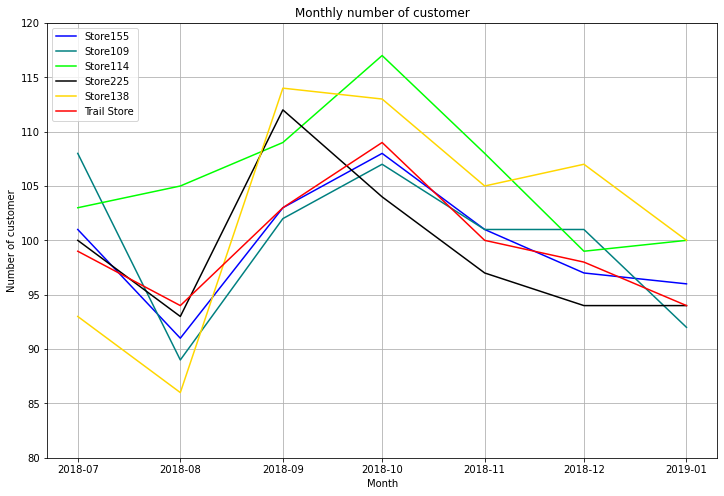

In [218]:
# Now we do the same visualization to examine the number of customer
plt.figure(figsize = (12,8))
plt.plot(store155.YEARMONTH, store155.ncustomer, color = 'blue')
plt.plot(store109.YEARMONTH, store109.ncustomer, color = 'teal')
plt.plot(store114.YEARMONTH, store114.ncustomer, color = 'lime')
plt.plot(store225.YEARMONTH, store225.ncustomer, color = 'black')
plt.plot(store138.YEARMONTH, store138.ncustomer, color = 'gold')
plt.plot(trialstore.YEARMONTH, trialstore.ncustomer, color = 'red')
# Set name and legend
plt.title("Monthly number of customer")
plt.legend(["Store155", "Store109", "Store114", "Store225", "Store138", "Trail Store"], loc = 2)
plt.xlabel("Month")
plt.ylabel("Number of customer")
# Set limit
plt.ylim((80, 120))
# set grid
plt.grid()
plt.show()

Store 155 (blue line) has the most identical trend to the trial store 86 (red line)
We do the same visualization for number of monthly total sales and also see that store 155 is the closest store. 
We choose store 155 as control store of trial store 86
### Accessment for store 86

In [219]:
# Assessment with number of sales as the metric
control_store = 155
# Find the scaling factor to apply to control store
trialSum = preTrialMeasure.loc[preTrialMeasure["STORE_NBR"] == trial_store]["TOT_SALES"].sum()
controlSum = preTrialMeasure.loc[preTrialMeasure["STORE_NBR"] == control_store]["TOT_SALES"].sum()
scalingFactorSales = trialSum/controlSum
scalingFactorSales

0.9700651481287743

In [220]:
# then apply the scaling factor to the control store
# Create a new dataframe with total sales of trial store, sales of control stores after scaling, and calculate the percentage diffirence
# df is the dataframe of full observation of 12 months (without filtering out the trial period)
# Extract the sales of trial store
trialSales = df.loc[df.STORE_NBR == trial_store, ["YEARMONTH", "TOT_SALES"]].reset_index(drop = True)
trialSales.rename(columns = {"TOT_SALES":"trialSales"}, inplace = True)

# Extract the sales of control store and apply the scaling factor
controlSales = df.loc[df.STORE_NBR == control_store, ["TOT_SALES"]].reset_index(drop = True)
controlSales.rename(columns = {"TOT_SALES":"controlSales"}, inplace = True)
controlSales["controlSales"] *= scalingFactorSales

# concat the two dataframe together
totalSales = pd.concat([trialSales, controlSales], axis = 1)
totalSales.YEARMONTH = pd.to_datetime(totalSales.YEARMONTH.astype(int), format = '%Y%m')

# Calculate the percentage diffirence 
totalSales["percentageDiff"] = abs((totalSales.controlSales - totalSales.trialSales)/ totalSales.controlSales)
totalSales.head(5)

,YEARMONTH,trialSales,controlSales,percentageDiff
0,2018-07-01,892.20,896.922236,0.005265
1,2018-08-01,764.05,759.269991,0.006296
2,2018-09-01,914.60,984.034086,0.070561
3,2018-10-01,948.40,934.948790,0.014387
4,2018-11-01,918.00,871.894555,0.052880


In [221]:
# calculate the standard deviation
stdDev = stdev(totalSales.loc[totalSales["YEARMONTH"] < '2019-02-01']["percentageDiff"])
stdDev

0.025833952854772368

In [222]:
# calculate the sales with 95% confidence interval and 5 % confidence interval
totalSales["controls95"] = totalSales["controlSales"] * (1+ stdDev*2)
totalSales["controls5"] = totalSales["controlSales"] * (1-stdDev*2)
totalSales

,YEARMONTH,trialSales,controlSales,percentageDiff,controls95,controls5
0,2018-07-01,892.20,896.922236,0.005265,943.264329,850.580142
1,2018-08-01,764.05,759.269991,0.006296,798.499882,720.040101
2,2018-09-01,914.60,984.034086,0.070561,1034.877067,933.191106
3,2018-10-01,948.40,934.948790,0.014387,983.255636,886.641944
4,2018-11-01,918.00,871.894555,0.052880,916.943521,826.845589
5,2018-12-01,841.20,824.361363,0.020426,866.954388,781.768338
6,2019-01-01,841.40,848.418979,0.008273,892.255010,804.582947
7,2019-02-01,913.20,864.522060,0.056306,909.190104,819.854016
8,2019-03-01,1026.80,780.320405,0.315870,820.637926,740.002884
9,2019-04-01,848.20,819.317024,0.035253,861.649419,776.984629


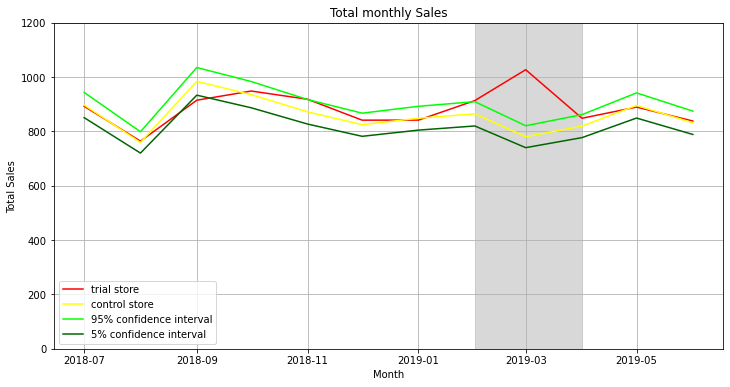

In [223]:
# Visualization 
plt.figure(figsize = (12,6))
plt.plot(totalSales.YEARMONTH, totalSales.trialSales, color = 'red')
plt.plot(totalSales.YEARMONTH, totalSales.controlSales, color = 'yellow')
plt.plot(totalSales.YEARMONTH, totalSales.controls95, color = 'lime')
plt.plot(totalSales.YEARMONTH, totalSales.controls5, color = 'darkgreen')

# set names 
plt.title("Total monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.legend(["trial store", "control store", "95% confidence interval", "5% confidence interval"], loc = 3)
plt.ylim((0,1200))

# highlight the trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.3)
# set grid
plt.grid()
plt.show()

The results show that the sales value of trial store is higher than its control store during the trial period
Almost during the trial period, the sales values of trial store lies outside the 95% confidence interval and 5% confidence 
interval range

Let´s move on to the number of customers

In [224]:
# Do the same thing to examine the number of customer
trialSum = preTrialMeasure.loc[preTrialMeasure.STORE_NBR == trial_store]["ncustomer"].sum()
controlSum = preTrialMeasure.loc[preTrialMeasure.STORE_NBR == control_store]["ncustomer"].sum()
scalingFactorCust = trialSum/controlSum
scalingFactorCust

1.0

In [225]:
# Extract the sales of trial store
trialCust = df.loc[df.STORE_NBR == trial_store, ["YEARMONTH", "ncustomer"]].reset_index(drop = True)
trialCust.rename(columns = {"ncustomer":"trialCust"}, inplace = True)

# Extract the sales of control store and apply the scaling factor
controlCust = df.loc[df.STORE_NBR == control_store, ["ncustomer"]].reset_index(drop = True)
controlCust.rename(columns = {"ncustomer":"controlCust"}, inplace = True)
controlCust["controlCust"] *= scalingFactorCust

# concat the two dataframe together
totalCust = pd.concat([trialCust, controlCust], axis = 1)
totalCust.YEARMONTH = pd.to_datetime(totalCust.YEARMONTH.astype(int), format = '%Y%m')
totalCust

,YEARMONTH,trialCust,controlCust
0,2018-07-01,99,101.0
1,2018-08-01,94,91.0
2,2018-09-01,103,103.0
3,2018-10-01,109,108.0
4,2018-11-01,100,101.0
5,2018-12-01,98,97.0
6,2019-01-01,94,96.0
7,2019-02-01,107,95.0
8,2019-03-01,115,94.0
9,2019-04-01,105,99.0


In [226]:
# Calculate the percentage diffirence
totalCust["percentageDiff"] = abs((totalCust.controlCust - totalCust.trialCust) / totalCust.controlCust)
totalCust
# Calculate the standard deviation 
stdDev = stdev(totalCust.loc[totalCust.YEARMONTH < '2019-02-01']["percentageDiff"])
stdDev
# Degree of freedom is 8 - 1 = 7 
dfFreedom = 7
# The null hypothesis is that there is 0 diffirence between trial store and control store
# Calculate the t-values in a new column 
totalCust["t_values"] = (totalCust["percentageDiff"] - 0) / stdDev
totalCust.loc[(totalCust.YEARMONTH > '2019-01-01') & (totalCust.YEARMONTH < '2019-05-01')]["t_values"]

7    11.819082
8    20.903430
9     5.670772
Name: t_values, dtype: float64

In [227]:
# calcualting the 95% confidence interval and 5% confidence interval and add as new columns
totalCust["controls95"] = totalCust["controlCust"] * (1 + stdDev*2)
totalCust["controls5"]  = totalCust["controlCust"] * (1-stdDev*2)
totalCust

,YEARMONTH,trialCust,controlCust,percentageDiff,t_values,controls95,controls5
0,2018-07-01,99,101.0,0.019802,1.852826,103.158864,98.841136
1,2018-08-01,94,91.0,0.032967,3.084651,92.945115,89.054885
2,2018-09-01,103,103.0,0.000000,0.000000,105.201614,100.798386
3,2018-10-01,109,108.0,0.009259,0.866368,110.308488,105.691512
4,2018-11-01,100,101.0,0.009901,0.926413,103.158864,98.841136
5,2018-12-01,98,97.0,0.010309,0.964616,99.073364,94.926636
6,2019-01-01,94,96.0,0.020833,1.949328,98.051989,93.948011
7,2019-02-01,107,95.0,0.126316,11.819082,97.030614,92.969386
8,2019-03-01,115,94.0,0.223404,20.903430,96.009240,91.990760
9,2019-04-01,105,99.0,0.060606,5.670772,101.116114,96.883886


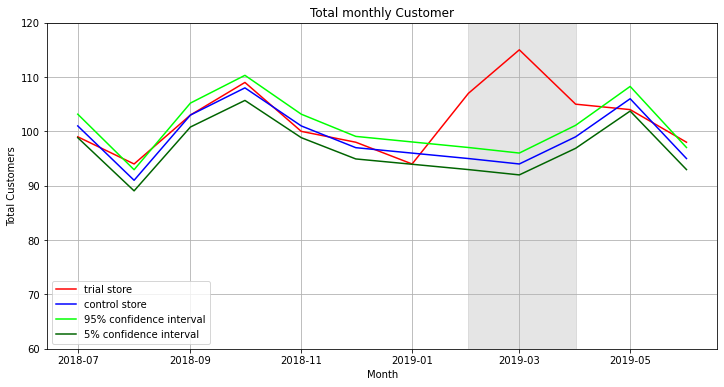

In [228]:
# Let´s make some visualization 
plt.figure(figsize = (12,6))
plt.plot(totalCust["YEARMONTH"], totalCust["trialCust"], color = 'red')
plt.plot(totalCust["YEARMONTH"], totalCust["controlCust"], color = 'blue')
plt.plot(totalCust["YEARMONTH"], totalCust["controls95"], color = 'lime')
plt.plot(totalCust["YEARMONTH"], totalCust["controls5"], color = 'darkgreen')
plt.ylim((60, 120))

# set names 
plt.title("Total monthly Customer")
plt.xlabel("Month")
plt.ylabel("Total Customers")
plt.legend(["trial store", "control store", "95% confidence interval", "5% confidence interval"], loc = 3)
# highlight the trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)
# set grid
plt.grid()
plt.show()

From the gragh, we can see that the number of customers are significantly higher for all three months during the trial period. The trial store witnessed an increase in number of customers right from the first month of trial. 
We should recheck with the Store Manager to see if the increase is solely due to the changes in store layouts
or is there any other promotions or discounts happening at that moment. 

### Conclusion for module 2
Conclusion: 
- We have found control store 233, 237, 155 for trial store 77, 88, 86 respectively
- From our observation, the trial store all witness an significantly increase in the number of customers, and sales
- Store 86 has remarkable increase in the number of customers, however, sales does not increase accordingly. Thus, we suggest double check with the Julia to check if there is any discounts, for promotion during the trial period
- Now that we are done with the data analysis, we can prepare data visualization and present to the Category Manager

